In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model
import numpy as np

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display
np.random.seed(42)

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 64)     192         ['input_1[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 64)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 3, 3, 64)     4160        ['re_lu[0][0]']                  
                                                                                              

2021-12-02 01:13:28.152266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 01:13:28.188724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 01:13:28.188963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 01:13:28.189590: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/30...


2021-12-02 01:13:29.611807: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


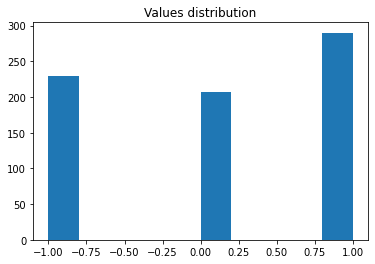

0 6
Win ratio: 0.0
Reject model.
Done
policy_accuracy:  0.73 value_mse:  0.45
2/30...


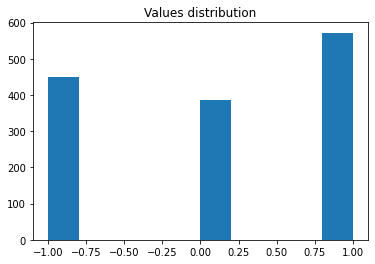

2 13
Win ratio: 0.13333333333333333
Reject model.
Done
policy_accuracy:  0.53 value_mse:  0.55
3/30...


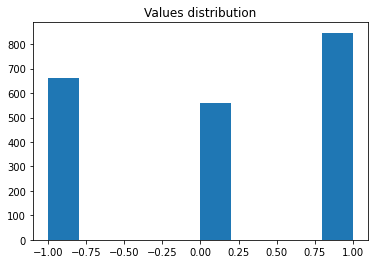

6 9
Win ratio: 0.4
Reject model.
Done
policy_accuracy:  0.48 value_mse:  0.55
4/30...


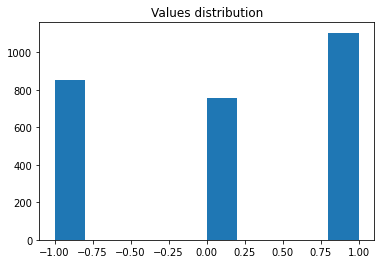

2 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.43 value_mse:  0.52
5/30...


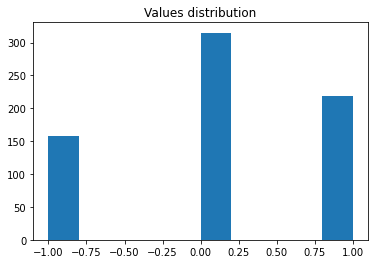

6 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.85 value_mse:  0.26
6/30...


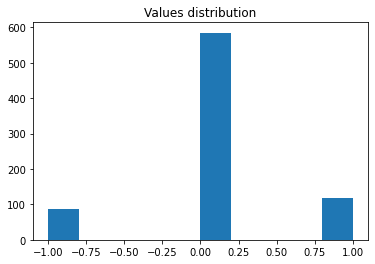

0 15
Win ratio: 0.0
Reject model.
Done
policy_accuracy:  1.00 value_mse:  0.21
7/30...


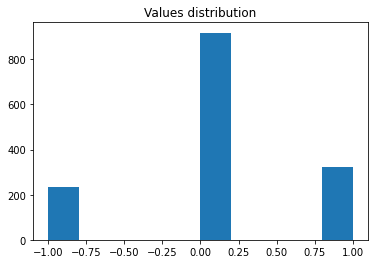

10 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.83 value_mse:  0.24
8/30...


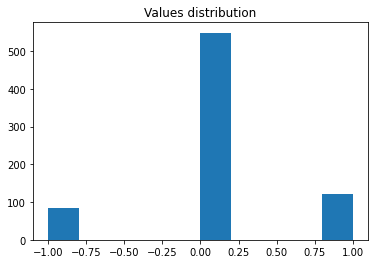

9 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.99 value_mse:  0.15
9/30...


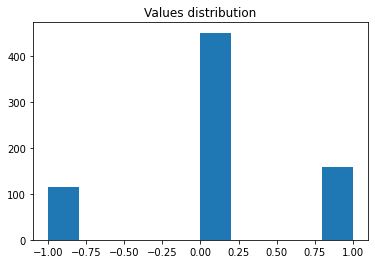

5 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  1.00 value_mse:  0.24
10/30...


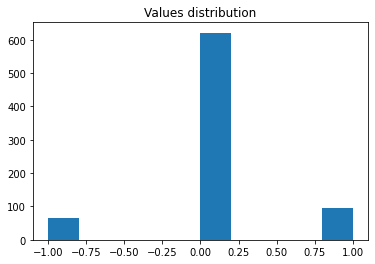

10 5
Win ratio: 0.6666666666666666
Accept model.
Done
policy_accuracy:  1.00 value_mse:  0.12
11/30...


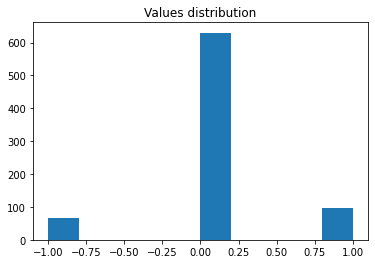

7 8
Win ratio: 0.4666666666666667
Reject model.
Done
policy_accuracy:  0.99 value_mse:  0.10
12/30...


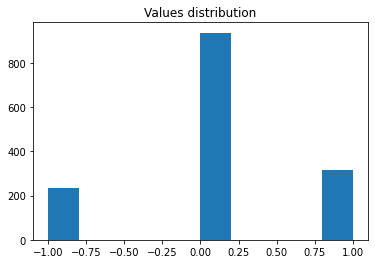

0 0
Win ratio: 0
Reject model.
Done
policy_accuracy:  0.69 value_mse:  0.27
13/30...


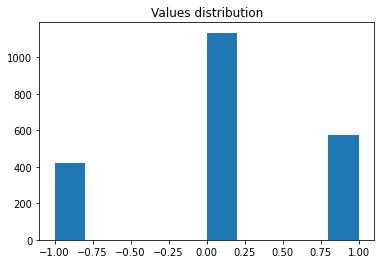

7 4
Win ratio: 0.6363636363636364
Accept model.
Done
policy_accuracy:  0.64 value_mse:  0.32
14/30...


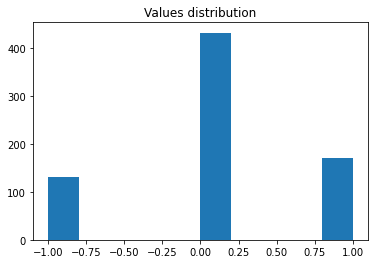

10 5
Win ratio: 0.6666666666666666
Accept model.
Done
policy_accuracy:  0.94 value_mse:  0.33
15/30...


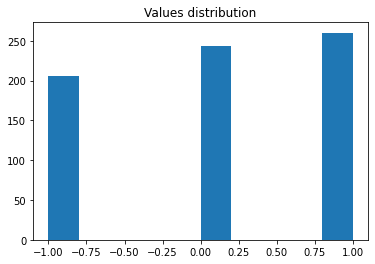

2 13
Win ratio: 0.13333333333333333
Reject model.
Done
policy_accuracy:  0.95 value_mse:  0.40
16/30...


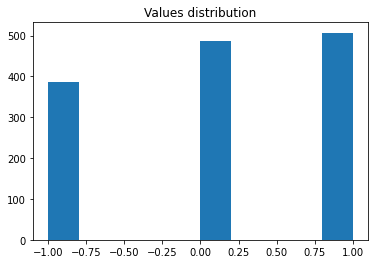

10 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.68 value_mse:  0.44
17/30...


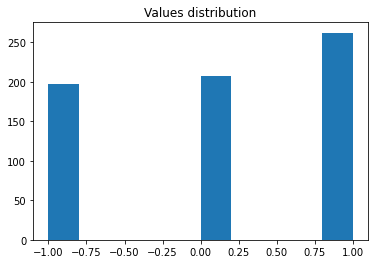

8 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.92 value_mse:  0.41
18/30...


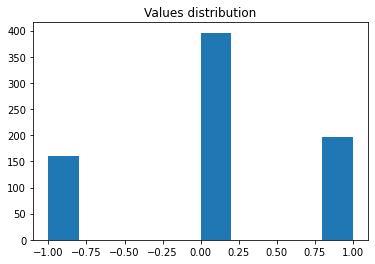

0 6
Win ratio: 0.0
Reject model.
Done
policy_accuracy:  0.92 value_mse:  0.35
19/30...


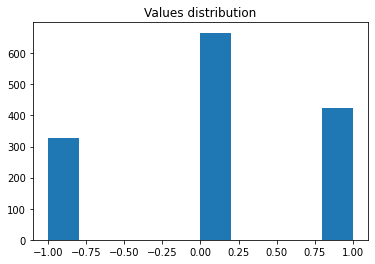

0 15
Win ratio: 0.0
Reject model.
Done
policy_accuracy:  0.73 value_mse:  0.40
20/30...


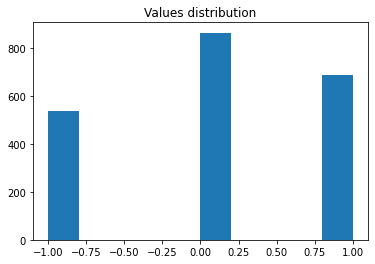

9 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.66 value_mse:  0.46
21/30...


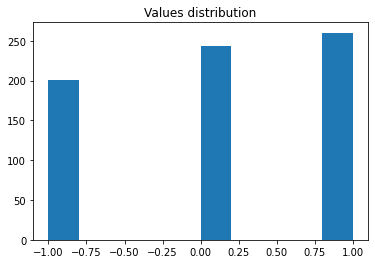

2 11
Win ratio: 0.15384615384615385
Reject model.
Done
policy_accuracy:  0.86 value_mse:  0.33
22/30...


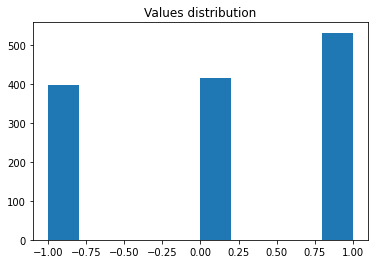

0 15
Win ratio: 0.0
Reject model.
Done
policy_accuracy:  0.60 value_mse:  0.37
23/30...


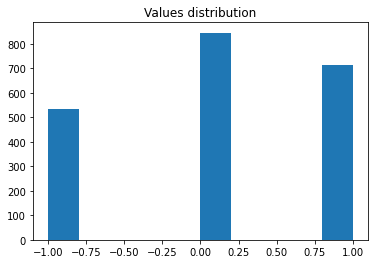

0 0
Win ratio: 0
Reject model.
Done
policy_accuracy:  0.60 value_mse:  0.35
24/30...


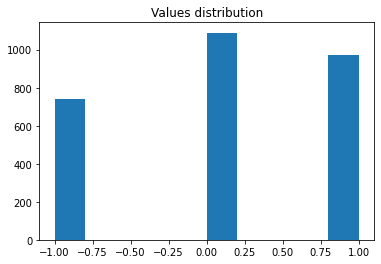

12 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.51 value_mse:  0.41
25/30...


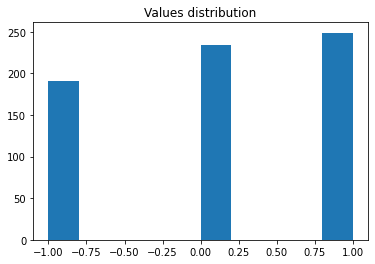

0 0
Win ratio: 0
Reject model.
Done
policy_accuracy:  0.81 value_mse:  0.50
26/30...


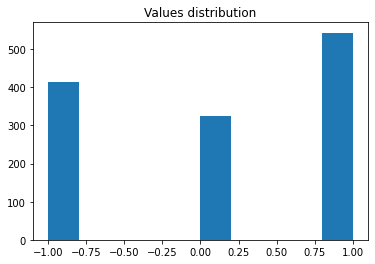

2 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.56 value_mse:  0.56
27/30...


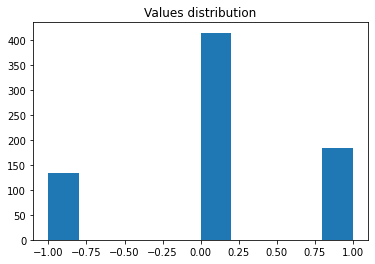

10 5
Win ratio: 0.6666666666666666
Accept model.
Done
policy_accuracy:  0.88 value_mse:  0.26
28/30...


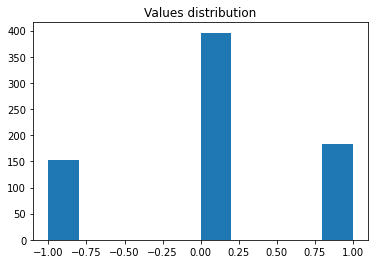

5 5
Win ratio: 0.5
Reject model.
Done
policy_accuracy:  0.98 value_mse:  0.40
29/30...


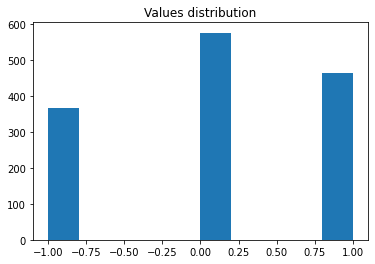

0 0
Win ratio: 0
Reject model.
Done
policy_accuracy:  0.66 value_mse:  0.48
30/30...


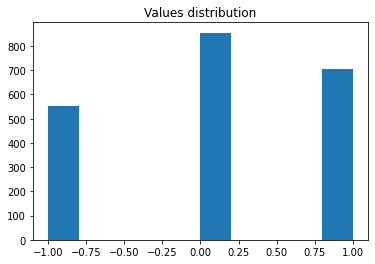

8 0
Win ratio: 1.0
Accept model.
Done
policy_accuracy:  0.53 value_mse:  0.49


/home/gaetan/.local/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [3]:
params = {"enable": False, "nb_games": 15, "nb_simulations": 50, "min_win_ratio": 0.55}
model.train(game, nb_iter=30, nb_simulations=25, nb_games=100, nb_epochs=40, accept_model_params=params)
model.save("networks/network_tic_tac_toe.h5")